In [1]:

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
palette = 'muted'
sns.set_palette(palette); sns.set_color_codes(palette)


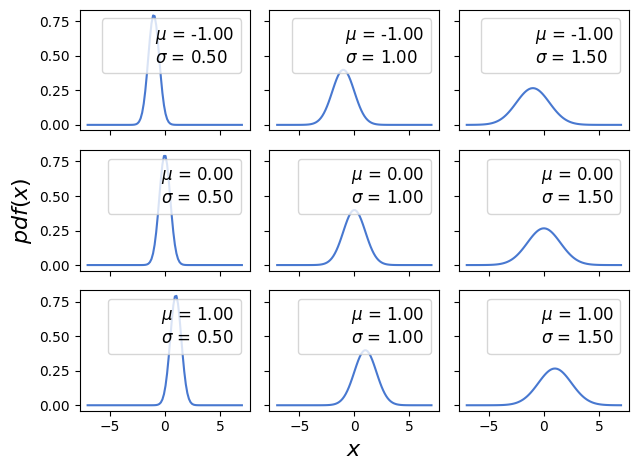

In [2]:
# drawing 9 plots
mu_params = [-1, 0 , 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 100)


# a different way of plotting -
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)
for i in range(3):
  for j in range(3):

    mu = mu_params[i]
    sd = sd_params[j]
    y = stats.norm(mu, sd).pdf(x)

    ax[i,j].plot(x, y)
    ax[i,j].plot(0, 0,
        label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu, sd), alpha=0)

    ax[i, j].legend(fontsize=12)

ax[2, 1].set_xlabel('$x$', fontsize=16)
ax[1, 0].set_ylabel('$pdf(x)$', fontsize=16)

plt.tight_layout()


Text(0, 0.5, '$CO_2 (ppmv)$')

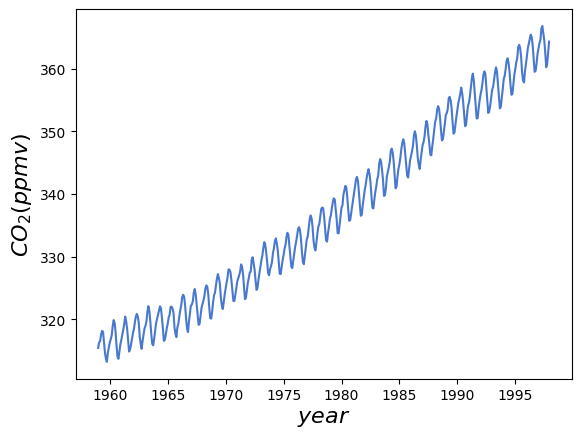

In [4]:

data = np.genfromtxt('./mauna_loa_CO2.csv', delimiter=',')
plt.plot(data[:,0], data[:,1])
plt.xlabel('$year$', fontsize=16)
plt.ylabel('$CO_2 (ppmv)$', fontsize=16)




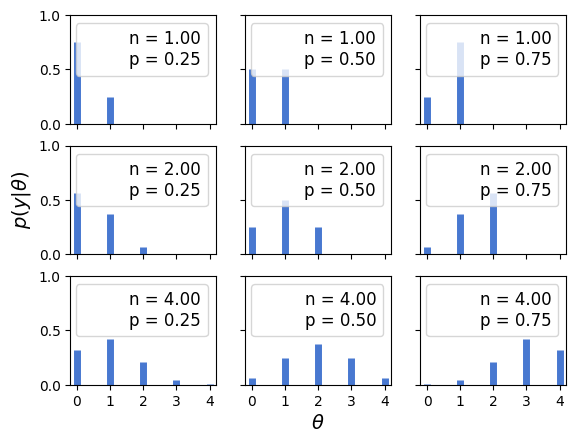

In [5]:
n_params =[1, 2, 4]
p_params = [0.25, 0.5, 0.75]
x = np.arange(0 , max(n_params)+1)
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True)

for i in range(3):
  for j in range(3):

    n = n_params[i]
    p = p_params[j]
    y = stats.binom(n=n, p=p).pmf(x)

    ax[i,j].vlines(x, 0, y, colors='b', lw=5)
    ax[i,j].set_ylim(0, 1)
    ax[i, j].plot(0, 0, label="n = {:3.2f}\np = {:3.2f}".format(n ,p), alpha=0)
    ax[i , j].legend(fontsize=12)

ax[2, 1].set_xlabel('$\\theta$', fontsize=14)
ax[1, 0].set_ylabel('$p(y|\\theta)$', fontsize=14)
ax[0, 0].set_xticks(x)


Text(0, 0.5, '$p(\\theta)$')

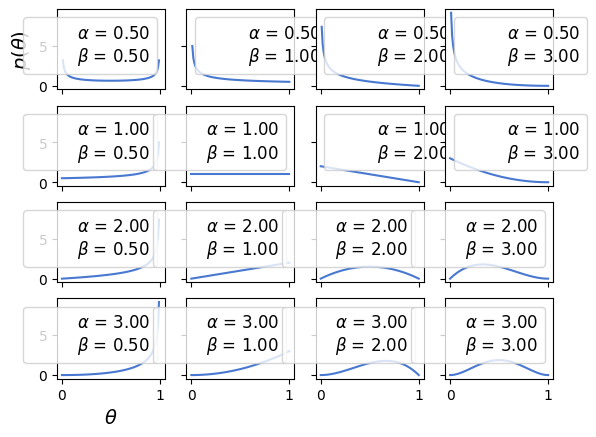

In [6]:
params = [0.5, 1, 2, 3]
x = np.linspace(0 , 1, 100)

f , ax = plt.subplots(len(params), len(params), sharex=True, sharey=True)

for i in range(4):
  for j in range(4):

    a = params[i]
    b = params[j]
    y = stats.beta(a, b).pdf(x)

    ax[i, j].plot(x, y)
    ax[i ,j ].plot(0 , 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
    ax[i , j].legend(fontsize=12)

ax[3, 0].set_xlabel('$\\theta$', fontsize=14)
ax[0, 0].set_ylabel('$p(\\theta)$', fontsize=14)



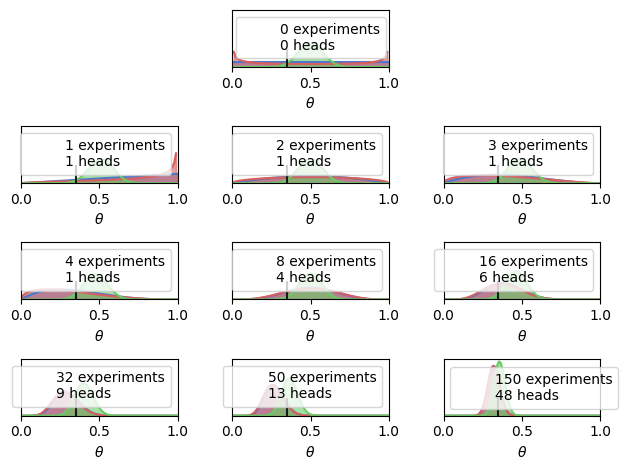

In [9]:

theta_real= 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data =[0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
  if idx == 0:
    plt.subplot(4, 3, 2)
  else:
    plt.subplot(4, 3, idx+3)
  y = data[idx]
  for(a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):

      p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
      plt.plot(x, p_theta_given_y, c)
      plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

  plt.axvline(theta_real, ymax=0.3, color='k')
  plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
  plt.xlim(0, 1)
  plt.ylim(0, 12)
  plt.xlabel(r"$\theta$")
  plt.legend()
  plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()



In [13]:

# posterior probabilty calculation
# we pass the grid points here

def posterior_grid(grid_points=100, heads=6, tosses=9):

  # define a grid
  grid = np.linspace(0 , 1, grid_points)

  # define prior
  prior = np.repeat(5, grid_points)

  # compute the likelihood at each point in the grid

  # Discrete random variables are defined from a standard form
  # and may require some shape parameters to complete its specification

  likelihood = stats.binom.pmf(heads, tosses, grid)

  # compute product of likelihood and prior
  unstd_posterior = likelihood * prior

  # standardize the posterior, so it sums to 1
  posterior = unstd_posterior / unstd_posterior.sum()
  return grid, posterior





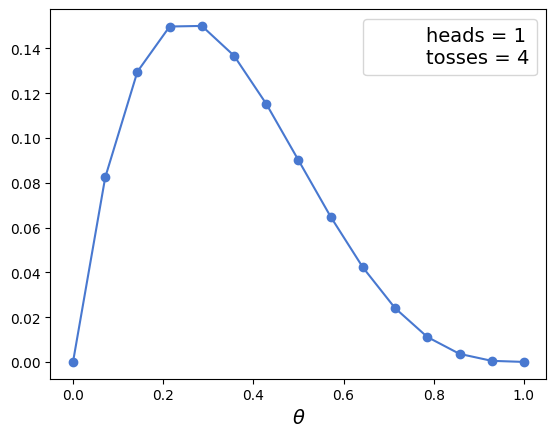

In [15]:

  # drawing the posterior grid
  points = 15
  h, n = 1, 4
  grid, posterior = posterior_grid(points, h, n)
  plt.plot(grid, posterior, 'o-')
  plt.plot(0, 0, label='heads = {}\ntosses = {}'.format(h, n), alpha=0)
  plt.xlabel(r'$\theta$', fontsize=14)
  plt.legend(loc=0, fontsize=14)

 #plt.savefig('B04958_02_01.png', dpi=300, figsize=(5.5, 5.5));
